In [1]:
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import mycolorbars


In [5]:
# Plot N for wetland and non-wetland separately
#nclu=NetCDFFile('hist_01_10.nc','r')
nclu = NetCDFFile('hist_01_10_n2o.nc','r')
ncvar_n2o_new = nclu.variables['n2o'][:]
ncvar_n2o_new = ncvar_n2o_new*1000000.
latnc = nclu.variables['lat'][:]
lonnc = nclu.variables['lon'][:]
lonnc = ((lonnc - 180) % 360) - 180

nclu_old = NetCDFFile('hist_01_10_n2o_normal.nc','r')
ncvar_n2o_old = nclu_old.variables['n2o'][:]
ncvar_n2o_old = ncvar_n2o_old * 1000000.

nclu2 = NetCDFFile('rcp45_91_00_n2o.nc','r')
ncvar2_n2o_new = nclu2.variables['n2o'][:]
ncvar2_n2o_new = ncvar2_n2o_new * 1000000.

nclu2_old = NetCDFFile('rcp45_91_00_n2o_normal.nc','r')
ncvar2_n2o_old = nclu2_old.variables['n2o'][:]
ncvar2_n2o_old = ncvar2_n2o_old * 1000000.

nclu3=NetCDFFile('rcp85_91_00_n2o.nc','r')
ncvar3_n2o_new = nclu3.variables['n2o'][:]
ncvar3_n2o_new = ncvar3_n2o_new * 1000000.

nclu3_old=NetCDFFile('rcp85_91_00_n2o_normal.nc','r')
ncvar3_n2o_old = nclu3_old.variables['n2o'][:]
ncvar3_n2o_old = ncvar3_n2o_old * 1000000.

# Mask out regions outside the CONUS
#ncmk=NetCDFFile('surfdata_05x05_13reg.nc','r')
#ncvar_mask = ncmk.variables['REGION_MASK_CRU_NCEP'][:]

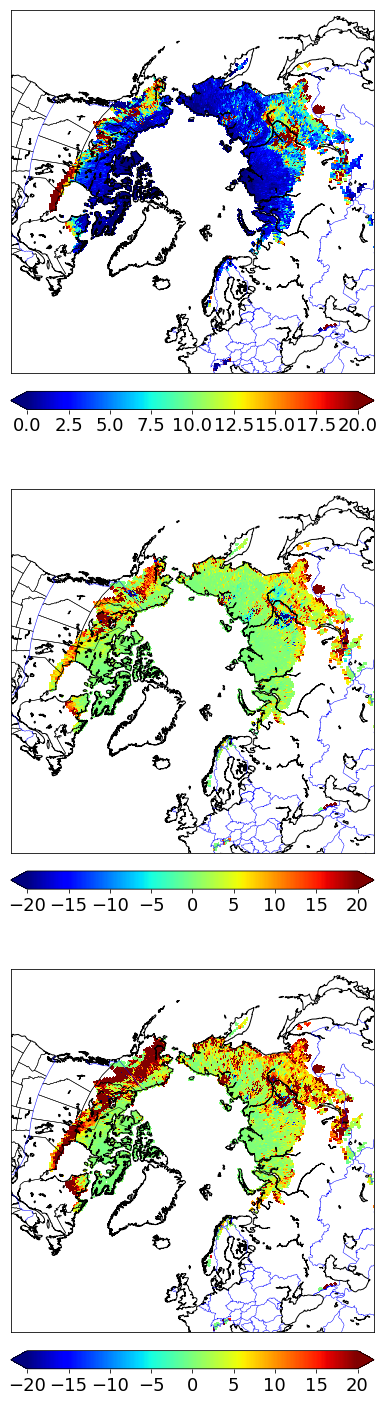

In [12]:
#http://matplotlib.org/basemap/users/mapsetup.html
# Wetland & Non-wetland net emission

# My personal colormap
my_cmap = mycolorbars.color_ch4diff()

fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(311)
#ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) ",fontsize=20)

#map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
#        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,ncvar_n2o_new[:,:],#+ncvar_nonwtld[:,:],
               norm=colors.Normalize(vmin=0.0, vmax=20),cmap=plt.cm.jet)
#              norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-1.0, vmax=1.0),cmap=my_cmap) # use log color scale,                   
#              norm=colors.LogNorm(vmin=0.01, vmax=10.),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
#cs1.cmap.set_under('w')
cbar = map.colorbar(cs1,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 

ax1 = fig.add_subplot(312)
#ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) RCP4.5",fontsize=20)

map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs = map.pcolormesh(x,y,ncvar2_n2o_old[:,:]-ncvar_n2o_old[:,:],#+ncvar2_nonwtld[:,:]-ncvar_nonwtld[:,:],
#cs = map.pcolormesh(x,y,ncvar2_wetland[:,:]+ncvar2_nonwtld[:,:],
               norm=colors.Normalize(vmin=-20, vmax=20),cmap=plt.cm.jet)
#              norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-1.0, vmax=1.0),cmap=my_cmap) # use log color scale,
#              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
#cs.cmap.set_under('w')
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 

ax1 = fig.add_subplot(313)
#ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) RCP8.5",fontsize=20)

map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')

# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs = map.pcolormesh(x,y,ncvar3_n2o_old[:,:]-ncvar_n2o_old[:,:],#+ncvar3_nonwtld[:,:]-ncvar_nonwtld[:,:],
#cs = map.pcolormesh(x,y,ncvar3_wetland[:,:]+ncvar3_nonwtld[:,:],
            norm=colors.Normalize(vmin=-20, vmax=20),cmap=plt.cm.jet)
#              norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-1.0, vmax=1.0),cmap=my_cmap) # use log color scale,
#              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
#cs.cmap.set_under('w')
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 

plt.show()
#plt.savefig('N2O_emission_old.jpg',dpi=300)

In [ ]:
#http://matplotlib.org/basemap/users/mapsetup.html
# Production of wetland & non-wetland

# My personal colormap
my_cmap = mycolorbars.color_ch4diff()

fig = plt.figure(figsize=(15,25))

ax1 = fig.add_subplot(311)
#ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) ",fontsize=20)

map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,ncvar_nonwtld_prod[:,:],
#              norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-1.0, vmax=100),cmap=my_cmap) # use log color scale,                   
              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cs1.cmap.set_under('w')
cbar = map.colorbar(cs1,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 

ax1 = fig.add_subplot(312)
#ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) RCP4.5",fontsize=20)

map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs = map.pcolormesh(x,y,ncvar2_nonwtld_prod[:,:] - ncvar_nonwtld_prod[:,:],
              norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-1.0, vmax=100),cmap=my_cmap) # use log color scale,
#              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
#cs.cmap.set_under('w')
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 

ax1 = fig.add_subplot(313)
#ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) RCP8.5",fontsize=20)

map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
ttt = ncvar3_nonwtld_prod[:,:]-ncvar_nonwtld_prod[:,:]
ppp = ncvar2_nonwtld_prod[:,:]-ncvar_nonwtld_prod[:,:]
ttt[ttt<-2.0] = ppp[ttt<-2.0]
#cs = map.pcolormesh(x,y,ncvar3_nonwtld_prod[:,:]-ncvar_nonwtld_prod[:,:],
cs = map.pcolormesh(x,y,ttt,
              norm=colors.SymLogNorm(linthresh=0.1, linscale=0.1, vmin=-1.0, vmax=100),cmap=my_cmap) # use log color scale,
#              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
#cs.cmap.set_under('w')
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 

plt.show()
#plt.savefig('fig9b.jpg',dpi=300)